# PROJEK UAS_QOTHRUNNADA KHALISH_202131030

## Import Library 

In [11]:
#perintah mengimpor modul ke dalam kode Python
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Word Segmentation 

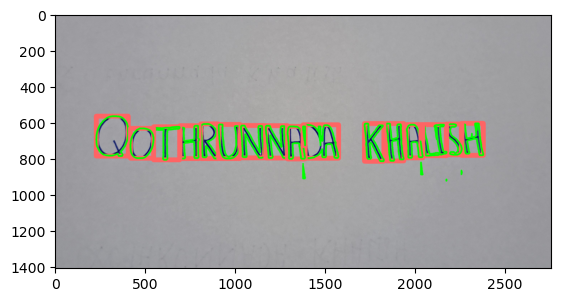

In [14]:
def character_segmentation(image_path):
    #perintah membaca gambar
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Preprocessing
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    ret, thresh = cv2.threshold(img_gray, 80, 255, cv2.THRESH_BINARY_INV)
    kernel = np.ones((3, 15), np.uint8)
    dilated = cv2.dilate(thresh, kernel, iterations=1)
    
     # Segmentation
    (contours, _) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    sorted_contours_lines = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[1])
    
     # karakter Segmentation
    img3 = img.copy()
    characters_list = []
    
    # perintah pemrosesan kontur dalam pengolahan citra menggunakan OpenCV
    for line in sorted_contours_lines:
        x, y, w, h = cv2.boundingRect(line)
        roi_line = dilated[y:y + h, x:x + w]

        (cnt, _) = cv2.findContours(roi_line.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        sorted_contour_words = sorted(cnt, key=lambda cntr: cv2.boundingRect(cntr)[0])

        for word in sorted_contour_words:
            if cv2.contourArea(word) < 400:
                continue

            x2, y2, w2, h2 = cv2.boundingRect(word)

            roi_word = roi_line[y2:y2 + h2, x2:x2 + w2]
            (cnt_chars, _) = cv2.findContours(roi_word.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
            sorted_contour_chars = sorted(cnt_chars, key=lambda cntr: cv2.boundingRect(cntr)[0])

            for character in sorted_contour_chars:
                x3, y3, w3, h3 = cv2.boundingRect(character)

                char_x = x + x2 + x3
                char_y = y + y2 + y3
                char_w = w3
                char_h = h3

                characters_list.append([char_x, char_y, char_x + char_w, char_y + char_h])
                cv2.rectangle(img3, (char_x, char_y), (char_x + char_w, char_y + char_h),  (255, 100, 100), 25)

                for i in range(len(character)):
                    x4, y4, w4, h4 = cv2.boundingRect(character[i])
                    char_x = x + x2 + x3 + x4
                    char_y = y + y2 + y3 + y4
                    char_w = w4
                    char_h = h4

                    cv2.line(img3, (char_x, char_y), (char_x + char_w, char_y), (0, 100, 0), 7)
                    cv2.line(img3, (char_x + char_w, char_y), (char_x + char_w, char_y + char_h), (0, 255, 0), 7) 
                    cv2.line(img3, (char_x + char_w, char_y + char_h), (char_x, char_y + char_h), (0, 255, 0), 7)  
                    cv2.line(img3, (char_x, char_y + char_h), (char_x, char_y), (0, 255, 0), 7) 

    # menampilkan citra img3 menggunakan imshow dari modul pyplot dan kemudian memperlihatkannya dengan show().                
    plt.imshow(img3)
    plt.show()

# nama file gambar yang dimasukkan 
image_path = 'fotonada.jpg'
character_segmentation(image_path)